In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [14]:
img_size = 2048
img_center = (img_size - 1) / 2
scale = 3
max_deg = 30
iters = 75000
color_saturation = 85 # percentile

In [15]:
matrix = np.zeros((img_size, img_size), dtype = np.uint64)
for p in np.arange(iters):
    deg = np.random.randint(2, max_deg + 1)
    coeffs = [np.random.choice([1, -1]) for i in range(deg + 1)] # littlewood polynomial
    roots = np.roots(coeffs)
    for i in range(len(roots)):
        x = int(img_center + roots[i].real * (img_size - 1) / scale)
        y = int(img_center + roots[i].imag * (img_size - 1) / scale)
        if x >= 0 and x <= img_size -1 and y >= 0 and y <= img_size - 1:
            matrix[x, y] += 1

In [16]:
matrix_backup = matrix
matrix = matrix_backup.copy()

In [17]:
matrix[:, img_center] = 0 # leave out purely real roots to avoid the line
max_counter = int(np.percentile(matrix[matrix != 0], color_saturation))
matrix = matrix.clip(0, max_counter).astype(np.float64)
matrix = matrix / matrix.max()

In [18]:
cmap = plt.get_cmap('gnuplot') # gnuplot # hot # inferno
img = cmap(matrix)[:, :, :-1]

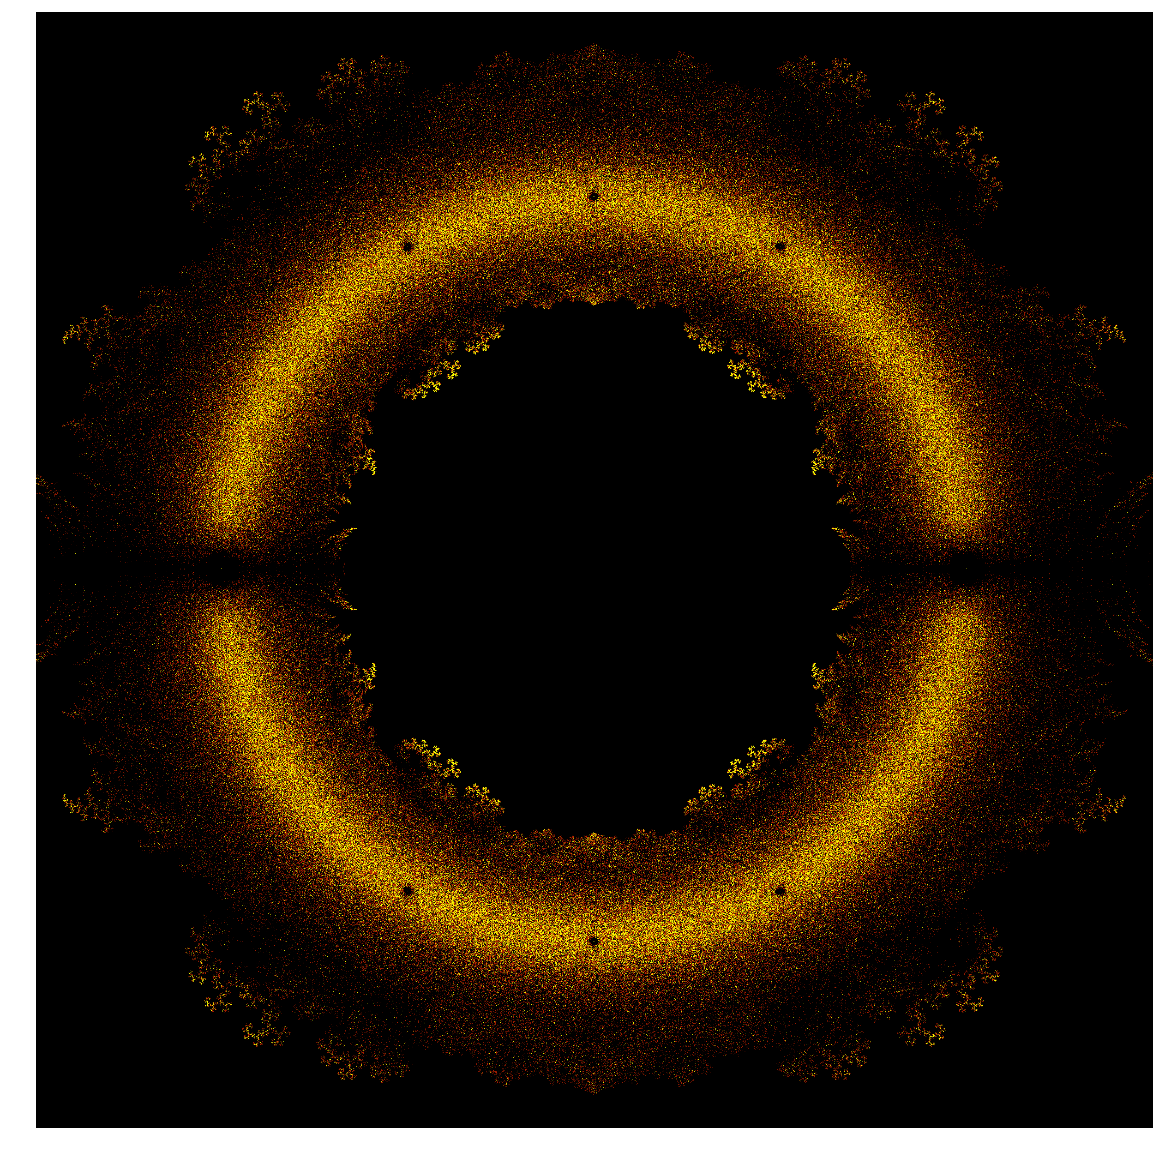

In [19]:
img_displayed = np.transpose(img, axes = [1, 0, 2])
plt.figure(figsize = (20, 20))
plt.axis('off')
plt.imshow(img_displayed)
plt.imsave('roots.png', img_displayed)